### Target:
    
    - Making the model as light as possible.

### Results:

    - Model has 9.3k parameters.

    - Train Accuracy = 99.32

    - Test Accuracy = 98.99

### Analysis:

    - Squeeze expand skeleton gradually increasing channels to 16.

    - Overfitting almost eliminated compared to previous iteration.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model3 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model3                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 4, 28, 28]           36                          0.39%
│    └─ReLU: 2-2                         [64, 4, 28, 28]           [64, 4, 28, 28]           --                             --
│    └─Conv2d: 2-3                       [64, 4, 28, 28]           [64, 8, 28, 28]           288                         3.10%
│    └─ReLU: 2-4                         [64, 8, 28, 28]           [64, 8, 28, 28]           --                             --
├─Sequential: 1-2                        [64, 8, 28, 28]           [64, 4, 14, 14]           --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=2.2917 Batch_id=937 Average Loss=2.3020 Accuracy=11.07: 100%|██████████| 938/938 [00:21<00:00, 44.61it/s]


Test set: Average loss: 2.2999, Accuracy: 1135/10000 (11.35%)

Epoch 2


Train: Batch Loss=0.3282 Batch_id=937 Average Loss=0.6149 Accuracy=78.57: 100%|██████████| 938/938 [00:19<00:00, 46.97it/s]


Test set: Average loss: 0.0763, Accuracy: 9750/10000 (97.50%)

Epoch 3


Train: Batch Loss=0.2002 Batch_id=937 Average Loss=0.0883 Accuracy=97.33: 100%|██████████| 938/938 [00:20<00:00, 45.13it/s]


Test set: Average loss: 0.0591, Accuracy: 9801/10000 (98.01%)

Epoch 4


Train: Batch Loss=0.1375 Batch_id=937 Average Loss=0.0645 Accuracy=98.01: 100%|██████████| 938/938 [00:21<00:00, 43.41it/s]


Test set: Average loss: 0.0411, Accuracy: 9857/10000 (98.57%)

Epoch 5


Train: Batch Loss=0.0196 Batch_id=937 Average Loss=0.0519 Accuracy=98.44: 100%|██████████| 938/938 [00:23<00:00, 39.96it/s]


Test set: Average loss: 0.0428, Accuracy: 9849/10000 (98.49%)

Epoch 6


Train: Batch Loss=0.0013 Batch_id=937 Average Loss=0.0433 Accuracy=98.64: 100%|██████████| 938/938 [00:21<00:00, 43.34it/s]


Test set: Average loss: 0.0341, Accuracy: 9885/10000 (98.85%)

Epoch 7


Train: Batch Loss=0.0092 Batch_id=937 Average Loss=0.0392 Accuracy=98.75: 100%|██████████| 938/938 [00:22<00:00, 42.54it/s]


Test set: Average loss: 0.0342, Accuracy: 9878/10000 (98.78%)

Epoch 8


Train: Batch Loss=0.0166 Batch_id=937 Average Loss=0.0349 Accuracy=98.86: 100%|██████████| 938/938 [00:21<00:00, 42.78it/s]


Test set: Average loss: 0.0349, Accuracy: 9880/10000 (98.80%)

Epoch 9


Train: Batch Loss=0.0186 Batch_id=937 Average Loss=0.0318 Accuracy=98.99: 100%|██████████| 938/938 [00:21<00:00, 43.26it/s]


Test set: Average loss: 0.0297, Accuracy: 9899/10000 (98.99%)

Epoch 10


Train: Batch Loss=0.0594 Batch_id=937 Average Loss=0.0290 Accuracy=99.09: 100%|██████████| 938/938 [00:21<00:00, 43.39it/s]


Test set: Average loss: 0.0443, Accuracy: 9863/10000 (98.63%)

Epoch 11


Train: Batch Loss=0.0607 Batch_id=937 Average Loss=0.0269 Accuracy=99.13: 100%|██████████| 938/938 [00:21<00:00, 44.00it/s]


Test set: Average loss: 0.0323, Accuracy: 9892/10000 (98.92%)

Epoch 12


Train: Batch Loss=0.0023 Batch_id=937 Average Loss=0.0243 Accuracy=99.17: 100%|██████████| 938/938 [00:21<00:00, 44.05it/s]


Test set: Average loss: 0.0317, Accuracy: 9886/10000 (98.86%)

Epoch 13


Train: Batch Loss=0.0116 Batch_id=937 Average Loss=0.0218 Accuracy=99.32: 100%|██████████| 938/938 [00:21<00:00, 43.27it/s]


Test set: Average loss: 0.0315, Accuracy: 9896/10000 (98.96%)

Epoch 14


Train: Batch Loss=0.0472 Batch_id=937 Average Loss=0.0211 Accuracy=99.28: 100%|██████████| 938/938 [00:21<00:00, 44.56it/s]


Test set: Average loss: 0.0312, Accuracy: 9892/10000 (98.92%)

Epoch 15


Train: Batch Loss=0.0112 Batch_id=937 Average Loss=0.0198 Accuracy=99.32: 100%|██████████| 938/938 [00:20<00:00, 44.67it/s]


Test set: Average loss: 0.0343, Accuracy: 9885/10000 (98.85%)



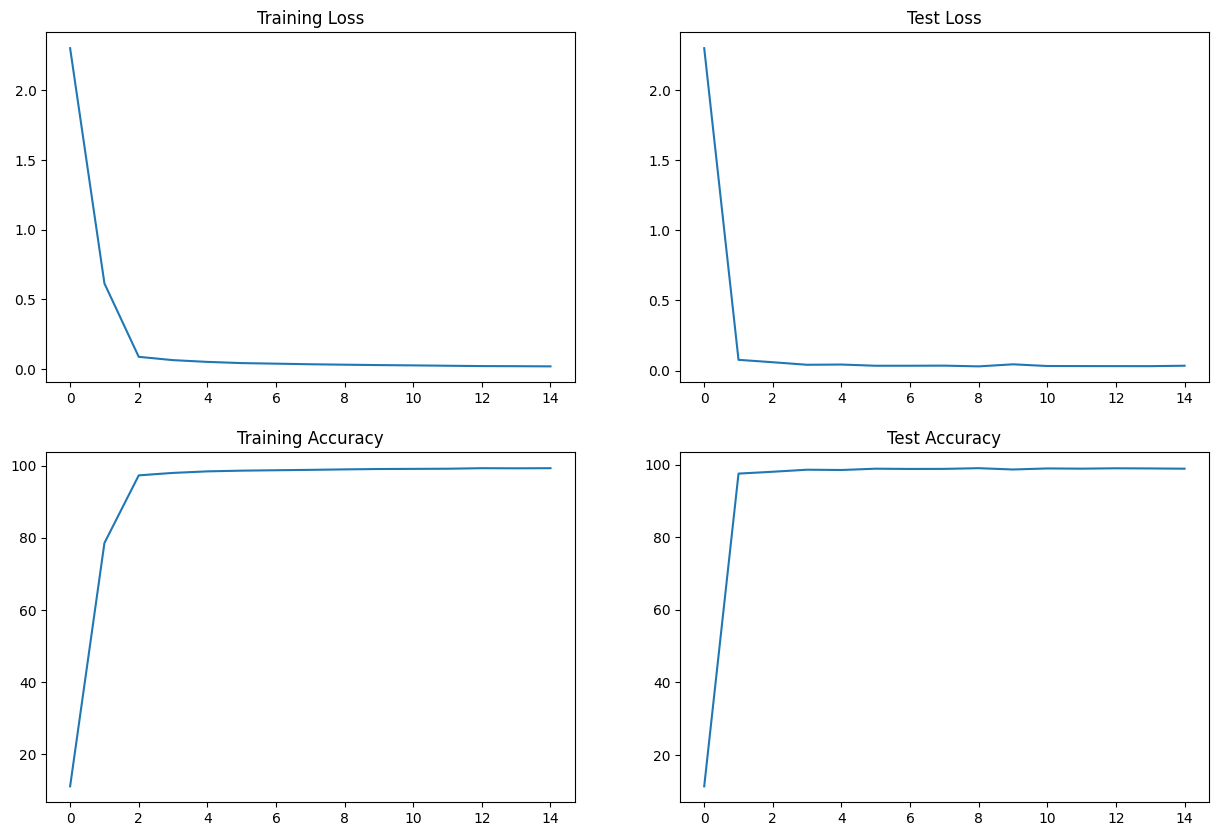

In [10]:
from utils import plot_stats
plot_stats()

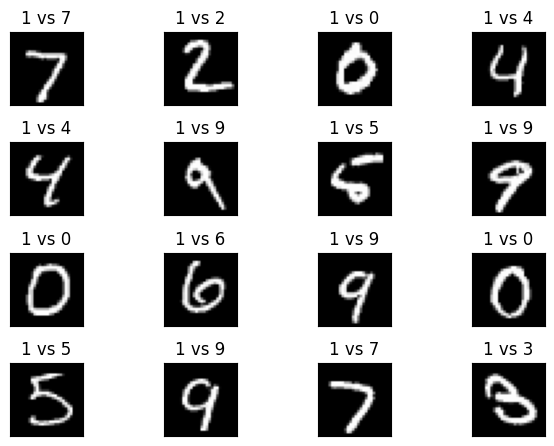

In [11]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual